## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset="train")

mydata_test = fetch_20newsgroups(subset="test")


In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
# Preprocessing the data

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    lines.append(line)
    line = re.sub(r'[^\w\s]',' ',line)
    word_list += word_tokenize(line)

# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(text)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
index = 0
for word in word_list:
    dict_idx[word] = index
    index += 1

In [8]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = dict()
    for word in word_list:
        freq_word[word] = 0
        for line in lines:
            if word in line:
                freq_word[word] += 1
    return freq_word

In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'jaker': 1,
 'Steam': 3,
 'dark': 145,
 'dozonoff': 6,
 'composer': 20,
 'vizquel': 1,
 'Frequent': 54,
 'M35KO': 1,
 '6IN': 18,
 '3CWJPV0LU29': 1,
 'Sciences': 155,
 '5Kbyte': 1,
 'eighth': 13,
 'cui': 215,
 'Trooper': 6,
 'coyoacan': 4,
 'Futaba': 1,
 'drawers': 3,
 'DATA': 22,
 'C5rBHt': 1,
 '103HZRD': 1,
 'Terminals': 2,
 'transceiver': 7,
 '9155': 1,
 'FEID3IVE3': 1,
 'CSTC': 1,
 'tartu': 53,
 'Contract': 17,
 'Ling': 6,
 'U8KEX': 1,
 'OL0RVO': 1,
 'C51vzu': 1,
 'Computing': 318,
 'compli': 273,
 'Zeppelin': 4,
 'syndication': 1,
 '91B': 4,
 'PHS': 5,
 'administering': 6,
 'Telepathy': 1,
 'I0NE1': 1,
 'GREEKS': 2,
 'HKLN': 1,
 'Murdering': 1,
 '_Macaca': 1,
 'wb9omc': 3,
 'C5stLG': 1,
 'XBMS_': 1,
 'environment': 192,
 'insulated': 6,
 '11H': 5,
 'cleverer': 1,
 '0LOWT': 1,
 'P3TZQCZ8O8DR': 1,
 'MAO111': 1,
 'Foreign': 27,
 'Hoodlum': 1,
 'unselfish': 5,
 'C5I77w': 2,
 'alighment': 1,
 '3FT': 2,
 'Communicatiions': 1,
 'Forester': 1,
 'businessmen': 10,
 '48090': 1,
 '4DI': 8,
 

In [10]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    n = len(document)
    term = len([token for token in document if token == word])
    tf = term / n
    
    return tf

In [11]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try:
        df = freq_word[word]
    except:
        df = 0
        
    idf = np.log(len(lines) / (df + 1))
    
    return idf

In [12]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    words = word_tokenize(sentence)
    
    for word in words:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)

        tf_idf_vec[dict_idx[word]] = tf * idf
        
    return tf_idf_vec

In [13]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

tf_idf_vec = []

for line in lines:
    
    line = re.sub(r'[^\w\s]',' ',line)
    
    tf_idf_vec.append(tfidf(line, dict_idx))

tf_idf_vec

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

## Multinomial Naive Bayes (10 Points)

In [44]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(tf_idf_vec)
y_train = mydata_train.target.reshape(-1, 1)
model = MultinomialNB()
model.fit(X_train, y_train)


MemoryError: Unable to allocate 13.1 GiB for an array with shape (11314, 155508) and data type float64

In [ ]:
#Perform testing on the train dataset

# Preprocessing the data

test_lines = [] 
test_list = [] 
 
for line in test:
    #tokenize the text documents and update the lists word_list and lines
    test_lines.append(line)
    line = re.sub(r'[^\w\s]',' ',line)
    test_list += word_tokenize(line)


tf_idf_test = []

for line in test_lines:
    
    line = re.sub(r'[^\w\s]',' ',line)
    
    tf_idf_vec.append(tfidf(line, dict_idx))

X_test = scaler.fit_transform(tf_idf_vec)

pred = model.predict(X_test)
pred

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.target, pred)
Accuracy = metrics.accuracy_score(mydata_train.target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
#pip install wikipedia

In [25]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = []

# list of articles to be downloaded
articles = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football", "Michael Jackson", "Taylor Swift", "Seattle", "Computer Science", "Google", "Microsoft", "Nikola Tesla", "Chinatown", "Brown Bear", "August", "Canada", "Harry Potter", "Robotic", "Cape Cod", "Summer", "Software Engineer", "Boston"]

# download and store articles (summaries) in this variable
data = []
for article in articles:
    print("Content:", article)
    topics.append(wikipedia.summary(article,  auto_suggest=False))
    #topics.append(wikipedia.page(article, auto_suggest=False).content)
    data.append(article)


Content: Northeastern Unversity
Content: Natural language processing
Content: Machine learning
Content: Quantum machine learning
Content: Artificial intelligence
Content: Data science
Content: Master in Data Science
Content: Bank of America
Content: Visa Inc.
Content: European Central Bank
Content: Bank
Content: Financial technology
Content: International Monetary Fund
Content: Basketball
Content: Swimming
Content: Tennis
Content: Football
Content: College Football
Content: Association Football
Content: Michael Jackson
Content: Taylor Swift
Content: Seattle
Content: Computer Science
Content: Google
Content: Microsoft
Content: Nikola Tesla
Content: Chinatown
Content: Brown Bear
Content: August
Content: Canada
Content: Harry Potter
Content: Robotic
Content: Cape Cod
Content: Summer
Content: Software Engineer
Content: Boston


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

I choose to clean the data because we don't need to consider the punctuation, stopwords and many other words that don't give a lot of meaning. Besides, I performed stemming opeartion so that similar words are reduced.

In [26]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_message(message):
    '''
        Input:
            review: a string containing a review.
        Output:
            review_cleaned: a processed review. 
    '''
    
    temp = list()
    ps = PorterStemmer()
    # remove links
    new_review = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', message)
    # remove html code
    new_review = re.sub('<.*?>', '', message)
    # word token
    tokens = word_tokenize(re.sub(r'[^\w\s]','',new_review).lower())
    # remove stopwords
    tokens_cleaned = [token for token in tokens if token not in stopwords.words('english')]
    for token in tokens_cleaned:
        stem = ps.stem(token)
        stem = stem.lower()
        
        temp.append(stem)
    message_cleaned = ' '.join(temp)

    return message_cleaned

message_cleaned = []
for line in topics:
    message_cleaned.append(clean_message(line))

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = TfidfVectorizer(stop_words={'english'})
tfidf = vectorizer.fit_transform(message_cleaned)
print(tfidf.shape)

(36, 2526)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [29]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2).fit_transform(tfidf)

In [39]:
import pandas as pd 

X_tsne_data = np.vstack((tsne.T, articles)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'article'])

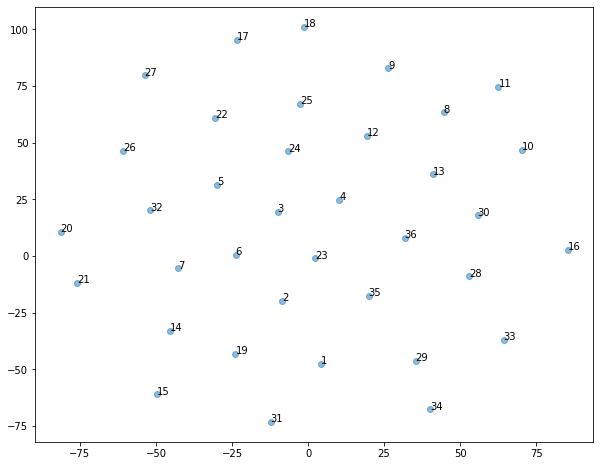

In [48]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
xs, ys = tsne[:, 0], tsne[:, 1]
plt.scatter(xs, ys, alpha=0.5)

for x, y, i in zip(xs, ys, range(1, len(articles)+1)):
    plt.annotate(i, (x, y))
plt.show()

Plot and annotate the points with different markers for different expected groups.

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
According to the visualization, we could see the related topics cluster together, such as 3 Machine learning, 4 Quantum machine learning, and 23 Computer Science; they all are related topics.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yijin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yijin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yijin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [2]:
# Import the train.txt and val.txt file into pandas dataframe format 
import pandas as pd
# train 
train_data = pd.read_csv('train.txt', sep = ';', header=None)
# validation
test_data = pd.read_csv('test.txt', sep = ';', header=None)
# and printout the train.shape and validation.shape 
print("training data shape:", train_data.shape)
print("testing data shape:", test_data.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

training data shape: (16000, 2)
testing data shape: (2000, 2)


In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yijin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# clean the text in the train and validation dataframes using the clean_text function provided above
y_train, y_test = train_data[1], test_data[1]

X_train, X_test = [], []

for line in train_data[0].values.tolist():
    X_train.append(clean_text(line))

for line in test_data[0].values.tolist():
    X_test.append(clean_text(line))

In [5]:
# initialise count vectorizer from sklearn module with default parameter

vec = CountVectorizer()

# fit on train dataset and transform both train and validation dataset

X_train_countVec = vec.fit_transform(X_train).toarray()
X_test_countVec = vec.transform(X_test).toarray()

In [17]:
# initialise tfidf vectorizer from sklearn module with default parameter

tfidf = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [7]:
# initialise label encoder from sklearn module

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l = LabelEncoder()

# fit on train labels and transform both train and validation labels

y_train_labelEncode = l.fit_transform(y_train)
y_test_labelEncode = l.transform(y_test)

In [8]:
# convert the labels into one hot encoding form

o = OneHotEncoder(sparse = False)

y_train_oneHot = o.fit_transform(y_train_labelEncode.reshape(-1, 1))
y_test_oneHot = o.transform(y_test_labelEncode.reshape(-1, 1))

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [9]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer

  inp = tf.keras.Input((X.shape[1],))

  model = tf.keras.models.Sequential()

  model.add(inp)

  # layer 2 : add the dense layer with 2048 units and relu activation

  model.add(tf.keras.layers.Dense(units=2048, activation="relu"))

  # layer 3 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(rate=0.5))
  
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(units=1024, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # layer 5 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(units=512, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # layer 7 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(units=256, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # layer 9 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization

  model.add(tf.keras.layers.Dense(units=128, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # layer 11 : add the dropout layer with dropout rate of 0.5

  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 12 : output layer with units equal to number of classes and activation as softmax

  model.add(tf.keras.layers.Dense(units=6, activation="softmax"))

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')])

  return model

In [10]:
# call the build_model function and initialize the model
model = build_model(X_train_countVec)

In [11]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
train_result = model.fit(x=X_train_countVec, y=y_train_oneHot, batch_size=8, epochs=10, validation_data=(X_test_countVec, y_test_oneHot))

Epoch 1/10
2000/2000 [==============================] - 1320s 660ms/step - loss: 2.3434 - accuracy: 0.4199 - precision: 0.5948 - recall: 0.1521 - auc: 0.7925 - val_loss: 1.2698 - val_accuracy: 0.6000 - val_precision: 0.7792 - val_recall: 0.3370 - val_auc: 0.8899
Epoch 2/10
2000/2000 [==============================] - 622s 311ms/step - loss: 1.3159 - accuracy: 0.6091 - precision: 0.7094 - recall: 0.4451 - auc: 0.8858 - val_loss: 1.1924 - val_accuracy: 0.7130 - val_precision: 0.7491 - val_recall: 0.5940 - val_auc: 0.9129
Epoch 3/10
2000/2000 [==============================] - 632s 316ms/step - loss: 1.2145 - accuracy: 0.6694 - precision: 0.7394 - recall: 0.5670 - auc: 0.9087 - val_loss: 1.1440 - val_accuracy: 0.7220 - val_precision: 0.7783 - val_recall: 0.5915 - val_auc: 0.9200
Epoch 4/10
2000/2000 [==============================] - 628s 314ms/step - loss: 1.1604 - accuracy: 0.6908 - precision: 0.7559 - recall: 0.6046 - auc: 0.9185 - val_loss: 1.1486 - val_accuracy: 0.7310 - val_precisio

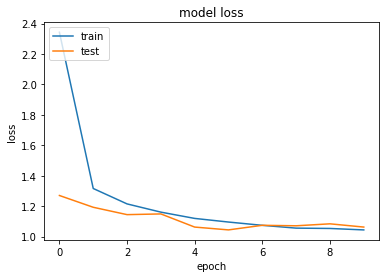

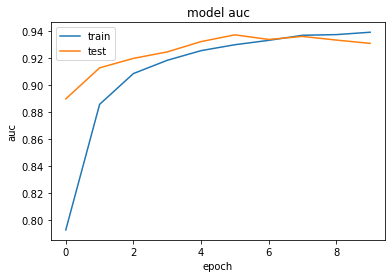

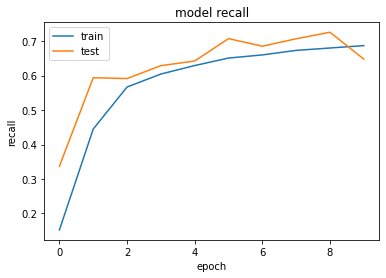

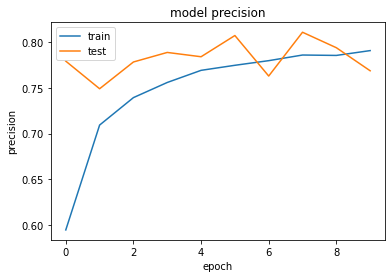

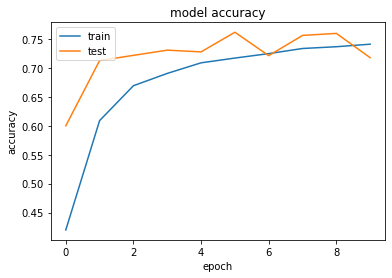

In [12]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
from matplotlib import pyplot as plt

plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['auc'])
plt.plot(train_result.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['recall'])
plt.plot(train_result.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['precision'])
plt.plot(train_result.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# again call the build_model function and initialize the model
model = build_model(X_train_tfidf)

In [19]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
train_result = model.fit(x=X_train_tfidf, y=y_train_oneHot, batch_size=8, epochs=10, validation_data=(X_test_tfidf, y_test_oneHot))

Epoch 1/10
2000/2000 [==============================] - 633s 316ms/step - loss: 1.9719 - accuracy: 0.3692 - precision: 0.4920 - recall: 0.0955 - auc: 0.7837 - val_loss: 1.3381 - val_accuracy: 0.4500 - val_precision: 0.5922 - val_recall: 0.2585 - val_auc: 0.8619
Epoch 2/10
2000/2000 [==============================] - 615s 308ms/step - loss: 1.3254 - accuracy: 0.5385 - precision: 0.6632 - recall: 0.3232 - auc: 0.8742 - val_loss: 1.2100 - val_accuracy: 0.6450 - val_precision: 0.7126 - val_recall: 0.5405 - val_auc: 0.9067
Epoch 3/10
2000/2000 [==============================] - 619s 309ms/step - loss: 1.2083 - accuracy: 0.6454 - precision: 0.7291 - recall: 0.5266 - auc: 0.9053 - val_loss: 1.1192 - val_accuracy: 0.6935 - val_precision: 0.7825 - val_recall: 0.5575 - val_auc: 0.9209
Epoch 4/10
2000/2000 [==============================] - 608s 304ms/step - loss: 1.1430 - accuracy: 0.6848 - precision: 0.7488 - recall: 0.5827 - auc: 0.9173 - val_loss: 1.1371 - val_accuracy: 0.6950 - val_precision

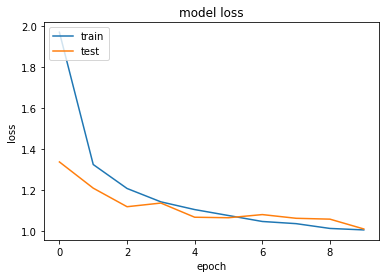

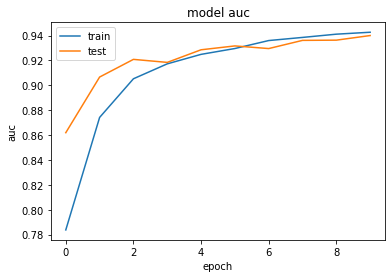

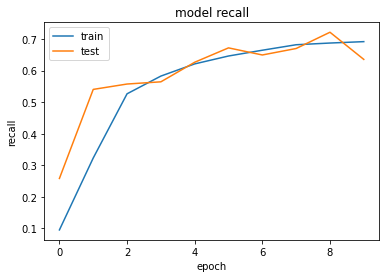

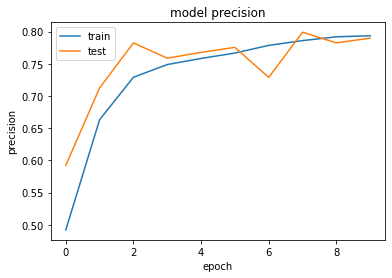

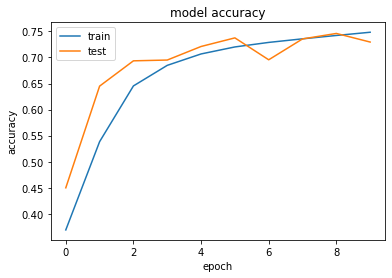

In [20]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['auc'])
plt.plot(train_result.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['recall'])
plt.plot(train_result.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['precision'])
plt.plot(train_result.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

We could see that the value of AUC, recall, precision, and the accuracy keep increasing, but the value of loss keeps reducing. 

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

The count Vectorizer and TFIDF both are methods for converting text data into vectors since the model can only process numerical data. However, the count Vectorizer only counts the number of times a word appears in the document which results in ignoring rare words but biasing in favor of the most frequent words. TFIDF could solve this problem, it will consider the overall document weightage of a word so which could help in dealing with the most frequent words (TFIDF: TF means the number of times a word appears in the text, and IDF means the inverse document frequency).

However, if there are many documents that cause the number of different words in the entire corpus to be very large and the number of words used in individual documents is far less than the total number of words in the word bag, the dimensions of the TFIDF vectors will be very large and most of the values in each vector will be zero. In this case, the vector obtained by the word bag model is high-dimensional sparse data.

Since TFIDF does not reduce the dimension of the vector, nor does it reduce the number of zeros in the vector, we could use Word2Vec and Glove to solve this problem.

Both Word2Vec and Glove enable the representation of a word in the form of a vector, but the two models differ in the way they are trained. Glove model is based on leveraging global word-to-word co-occurrence counts leveraging the entire corpus, while Word2Vec leverages co-occurrence within the local context. Thus, for larger training data, Golve is running faster.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

The bag of word model ignores the grammar and word order of the text and regards it as a collection of several words. It considers that each word appears independently in the text, and considers the number of times the words in the vocabulary appear in the sentence. However, the bag of words has many disadvantages: it does not consider the order between words, it cannot reflect the keywords of a sentence, and it considers that words with more occurrences in a text have more weight.

TFIDF has the same idea as the bag of word model, but the values of vectors are different. The value in the vector is the weight of the word corresponding to that position in the text. TFIDF believes that words like "of", "I", and "you" appear more frequently but should not be given too much weight, so TFIDF uses document frequency which is the number of times a word appears in a document to reduce the weight of these words, which means the higher the frequency of documents, the lower the weight of the word.